<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
<br />
Артём, доброго дня! рад приветствовать тебя в финале) <br />
Вот и он подобрался, поздравляю. Остался последний рывок в этом марафоне)<br>
<br />    
Несмотря на то, что проект не такой уж и простой как с позиции кода, так и в понимании процессов - <br />тебе удалось сдать его вовремя, это большой плюс для всех нас, спасибо:)<br />
<br />
Меня зовут Николай. <br />И на этом этапе Вашего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='purple'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако что есть ещё что-то или в коде или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Как и всегда в спринтах - ставлю своей целью максимально помочь. Поэтому, все мои комментарии - это только способ передать свой опыт для помощи в твоих достижениях.

<div class="alert alert-info"> <b>Комментарий студента 2:</b> Еще раз привет! Спасибо за быстрое ревью. Постарался исправить подход к группировке и остальные замечания по проекту </div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 3</u></b>
</font>
<font color='green'><br>
ОК, Артём, Пошёл смотреть...

# Выпускной проект по теме "Промышленность". Сивцов Артём

Для начала импортируем библиотеки, необходимые для работы:

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error

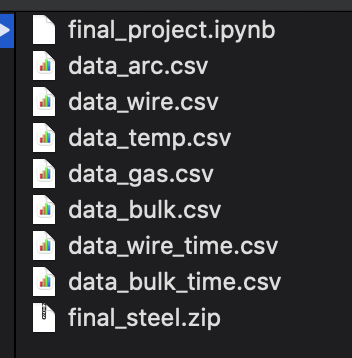

Загрузим данные и проведем небольшой анализ:

df_arc = pd.read_csv('./data_arc.csv')
df_wire = pd.read_csv('./data_wire.csv')
df_temp = pd.read_csv('./data_temp.csv')
df_gas = pd.read_csv('./data_gas.csv')
df_bulk = pd.read_csv('./data_bulk.csv')
df_wire_time = pd.read_csv('./data_wire_time.csv')
df_bulk_time = pd.read_csv('./data_bulk_time.csv')

In [3]:
df_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')
df_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
df_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
df_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
df_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')
df_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
df_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')

In [4]:
df_arc.columns = ['key', 'start_arc_time', 'end_arc_time', 'active_power', 'reactive_power']
df_arc.head()

,key,start_arc_time,end_arc_time,active_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


def 

In [5]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
key               14876 non-null int64
start_arc_time    14876 non-null object
end_arc_time      14876 non-null object
active_power      14876 non-null float64
reactive_power    14876 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [6]:
df_arc.describe()

,key,active_power,reactive_power
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388


Посмотрим распределения и удалим выбросы

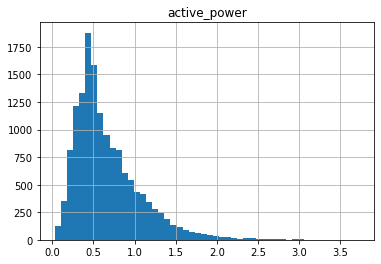

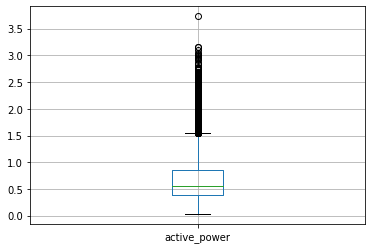

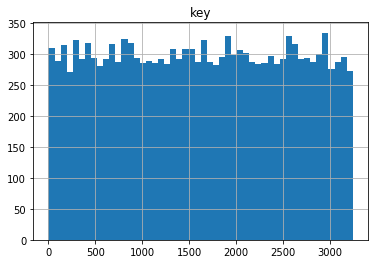

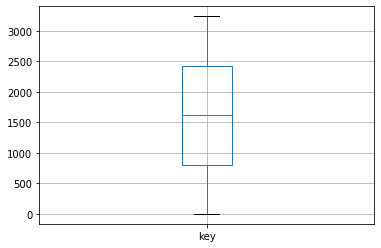

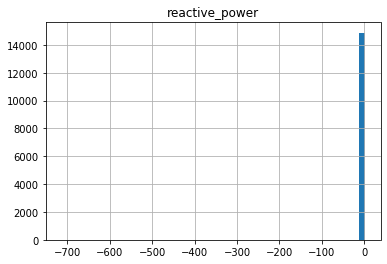

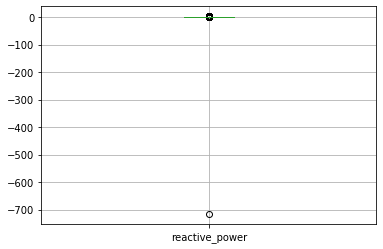

In [7]:
for column in (df_arc.select_dtypes(include=['int64']) | df_arc.select_dtypes(include=['float64'])).columns:
    df_arc.hist(column, bins=50)
    plt.show()
    df_arc.boxplot(column)
    plt.show()

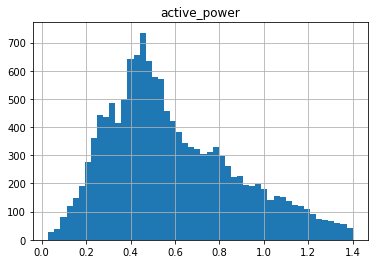

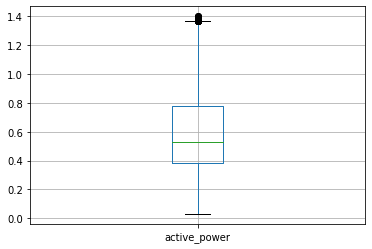

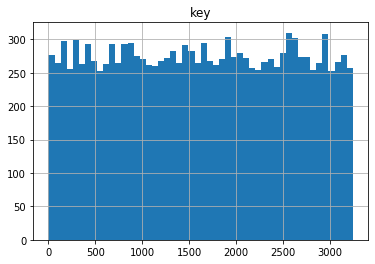

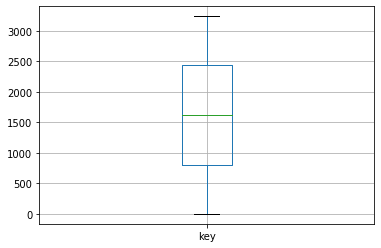

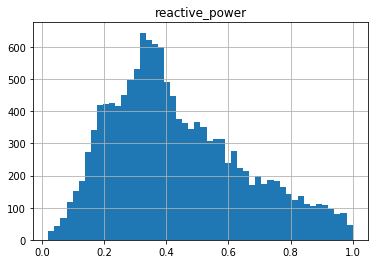

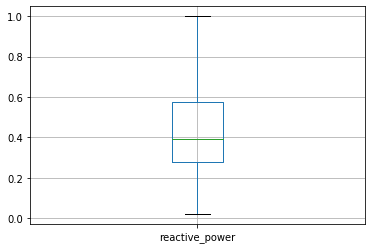

In [8]:
df_arc = df_arc.query('active_power < 1.4 and (reactive_power >= 0 and reactive_power < 1)')
for column in (df_arc.select_dtypes(include=['int64']) | df_arc.select_dtypes(include=['float64'])).columns:
    df_arc.hist(column, bins=50)
    plt.show()
    df_arc.boxplot(column)
    plt.show()

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
хорошо. С выбросами тут действительно важный момент. Ведь выброс выбросу рознь) Бывает, что выброс - то реальная бизнес-практика. И если удалить их, то мы получим модель, так скажем, работующую не во всех диапазонах входящих в неё факторов. Т.е. по метрикам модель будет хорошая. А вот по бизнесу - не совсем применимая.<br>А бывают выбросы - точно выбросы - ошибки учёта данных, например.<br>
    
В самой теории выбросов принято считать, что выбросы в интервале от q_3 + 1.5*irq до q_3 + з*irq - на усмотрение бизнеса. А вот всё, что больше q_3 + 3*irq - уже точно надо работать - на удаление!!!<br>
q_3 - верхняя квартиль<br>
irq - интерквартильный размах

В таких проектах, также лучше использовать такую философию анализа выбросов:<br>
Ящик с усами - даёт пищу для размышлений (не более того, не воспринимаем его как сигнал к действию).<br>
А потом смотрим то явление, что изучаем. Данные значения - могут быть в реальности или нет?<br>
Вот в данном случае с температурой плавления: по справочнику она у металла = окло 1500, т.е. 1200 - действиетльно кажется очень странным значением. 

In [9]:
df_arc = df_arc.groupby(by='key').agg({'active_power' : 'sum', 'reactive_power' : 'sum'}).reset_index()
df_arc.head()

,key,active_power,reactive_power
0,1,3.218784,2.120572
1,2,3.052598,1.998112
2,3,2.525882,1.599076
3,4,3.209250,2.060298
4,5,1.725508,1.204867


добавим фичу полной мощности как корень из суммы квадратов мощностей и проверим ее полезность при обучении в последствии

In [10]:
df_arc['full_power'] = ((df_arc['active_power']) ** 2 + (df_arc['reactive_power']) ** 2) ** 0.5
df_arc.head()

,key,active_power,reactive_power,full_power
0,1,3.218784,2.120572,3.854529
1,2,3.052598,1.998112,3.648398
2,3,2.525882,1.599076,2.989502
3,4,3.209250,2.060298,3.813674
4,5,1.725508,1.204867,2.104539


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>хорошая идея с новыми факторами - значимые факторы могут быть. Вопрос только в том - стоит ли их все тянуть в модель - не будет ли мультиколлинеарности. Например все мощности коррелируют между собой? если да - то не стоит их вместе использовать...

In [11]:
df_wire.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
key       3081 non-null int64
Wire 1    3055 non-null float64
Wire 2    1079 non-null float64
Wire 3    63 non-null float64
Wire 4    14 non-null float64
Wire 5    1 non-null float64
Wire 6    73 non-null float64
Wire 7    11 non-null float64
Wire 8    19 non-null float64
Wire 9    29 non-null float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [13]:
df_wire = df_wire.fillna(0)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>ок, 0 - то, что надо)

In [14]:
df_wire.describe()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000
mean,1623.426485,100.044411,17.712733,3.874524,0.261019,0.004911,1.137695,0.035842,0.330697,0.321492
std,932.996726,42.841120,33.517734,30.310417,4.293865,0.272615,8.958111,0.774190,4.392677,3.806904
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,823.000000,70.281120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1619.000000,100.114563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2434.000000,125.798405,23.162880,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132000,180.454575,32.847674,102.762401,90.053604


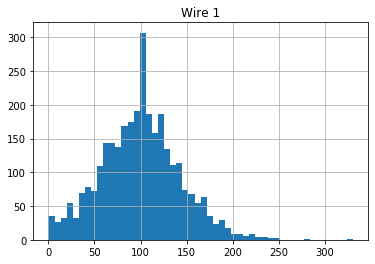

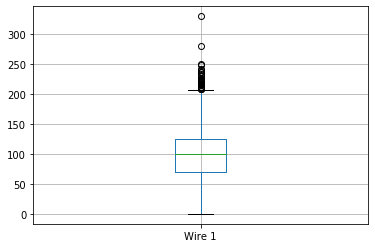

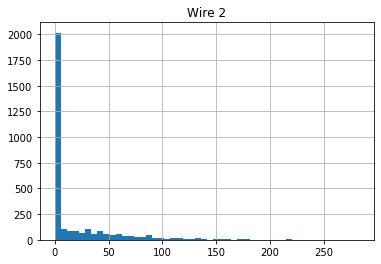

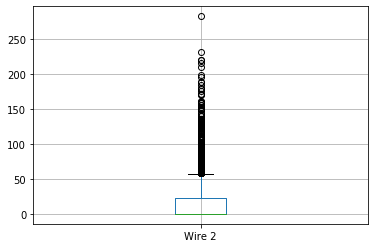

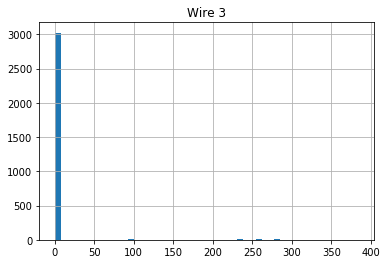

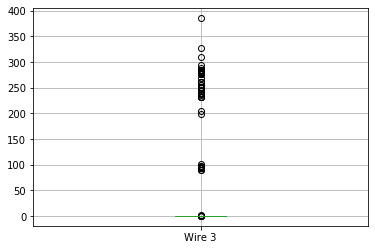

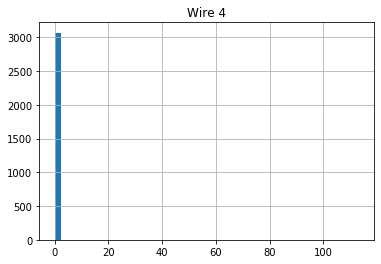

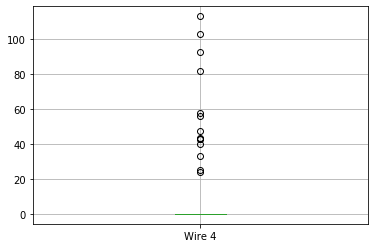

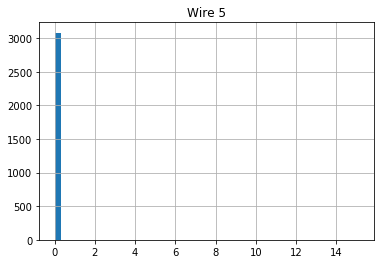

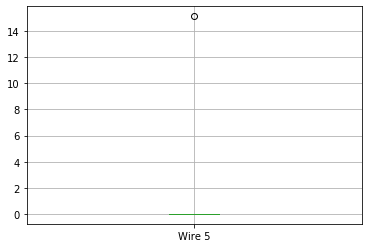

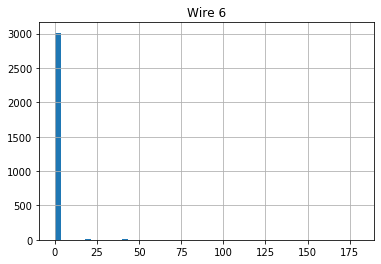

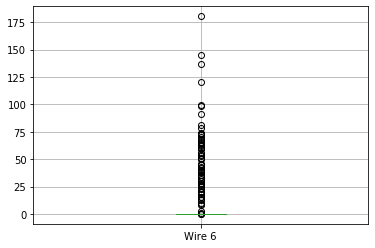

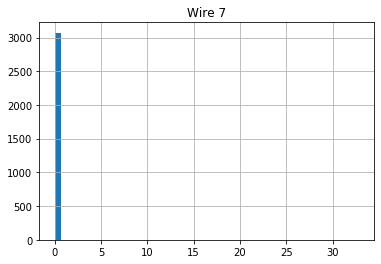

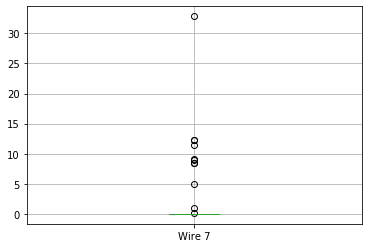

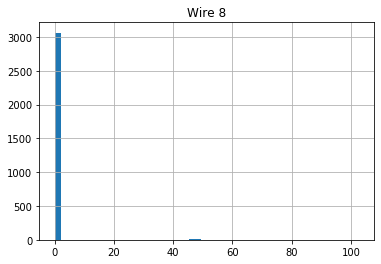

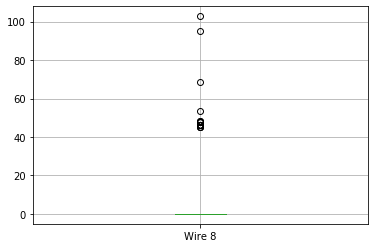

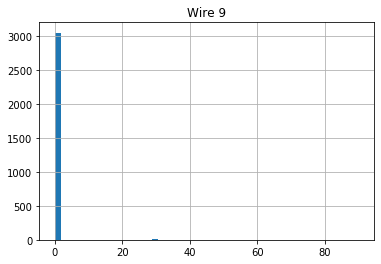

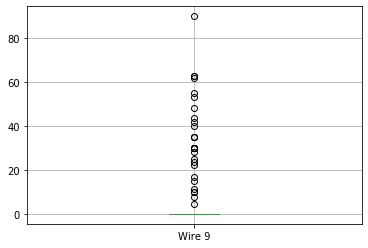

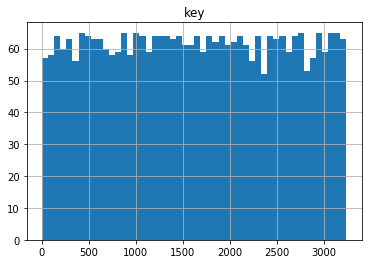

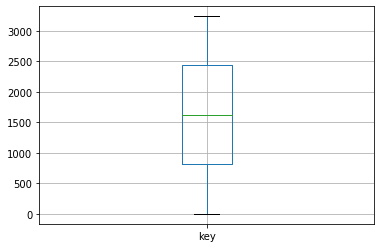

In [15]:
for column in (df_wire.select_dtypes(include=['int64']) | df_wire.select_dtypes(include=['float64'])).columns:
    df_wire.hist(column, bins=50)
    plt.show()
    df_wire.boxplot(column)
    plt.show()

In [16]:
df_wire.columns = ['key', 'wire_1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6',
       'Wire 7', 'Wire 8', 'Wire 9']
df_wire.head()

,key,wire_1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


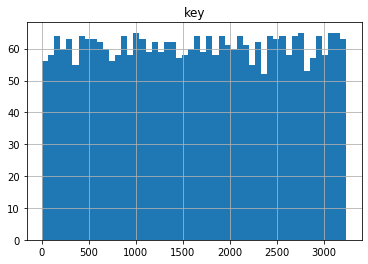

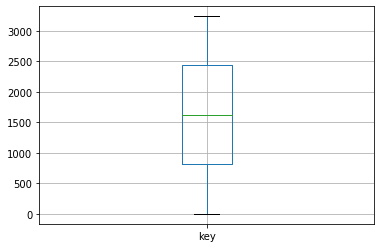

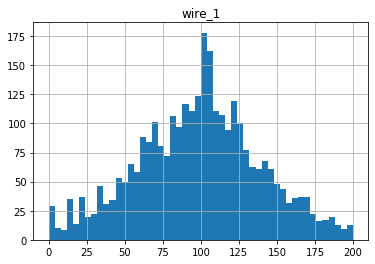

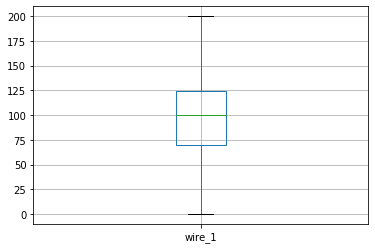

In [17]:
df_wire = df_wire[['key', 'wire_1']].query('wire_1 < 200')
for column in (df_wire.select_dtypes(include=['int64']) | df_wire.select_dtypes(include=['float64'])).columns:
    df_wire.hist(column, bins=50)
    plt.show()
    df_wire.boxplot(column)
    plt.show()

In [18]:
df_wire = df_wire.groupby(by = 'key').agg('sum').reset_index()
df_wire.head()

,key,wire_1
0,1,60.059998
1,2,96.052315
2,3,91.160157
3,4,89.063515
4,5,89.238236


In [19]:
df_temp.columns = ['key', 'temp_time', 'temp']
df_temp.head()

,key,temp_time,temp
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


время входа время выхода добавить в виде колонки - в результате одна строка на партию

In [20]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
key          15907 non-null int64
temp_time    15907 non-null object
temp         13006 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


In [21]:
df_temp.describe()

,key,temp
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000


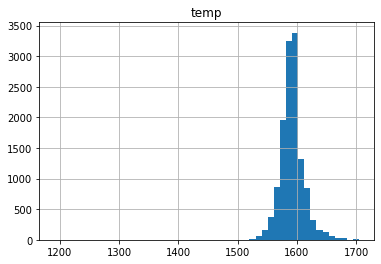

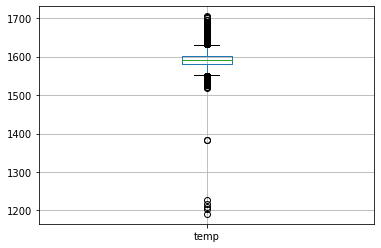

In [22]:
df_temp.hist('temp', bins=50)
plt.show()
df_temp.boxplot('temp')
plt.show()

выбросы пока оставим - это целевой признак

In [23]:
df_gas.columns = ['key', 'gas']
df_gas.head()

,key,gas
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [24]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
key    3239 non-null int64
gas    3239 non-null float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [25]:
df_gas.describe()

,key,gas
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


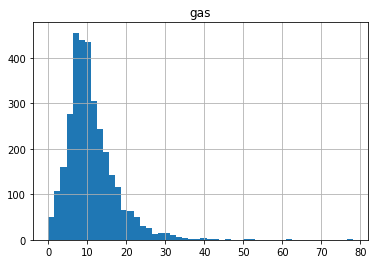

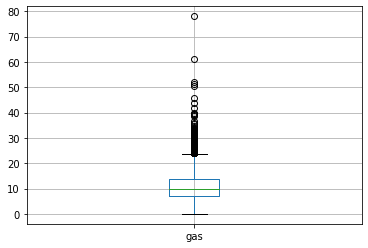

In [26]:
df_gas.hist('gas', bins=50)
plt.show()
df_gas.boxplot('gas')
plt.show()

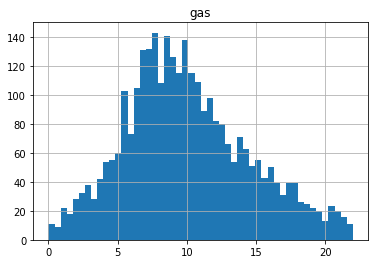

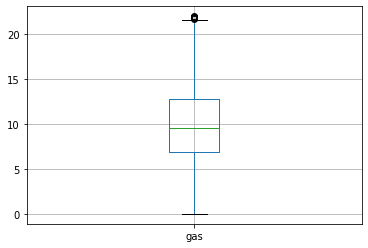

In [27]:
df_gas = df_gas.query('gas <= 22')
df_gas.hist('gas', bins=50)
plt.show()
df_gas.boxplot('gas')
plt.show()

In [28]:
df_gas = df_gas.groupby(by = 'key').agg('sum')
df_gas

,gas
key,
2,12.555561
4,18.841219
5,5.413692
6,11.273392
7,9.836267
...,...
3237,5.543905
3238,6.745669
3239,16.023518


In [29]:
df_bulk.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [30]:
df_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
key        3129 non-null int64
Bulk 1     252 non-null float64
Bulk 2     22 non-null float64
Bulk 3     1298 non-null float64
Bulk 4     1014 non-null float64
Bulk 5     77 non-null float64
Bulk 6     576 non-null float64
Bulk 7     25 non-null float64
Bulk 8     1 non-null float64
Bulk 9     19 non-null float64
Bulk 10    176 non-null float64
Bulk 11    177 non-null float64
Bulk 12    2450 non-null float64
Bulk 13    18 non-null float64
Bulk 14    2806 non-null float64
Bulk 15    2248 non-null float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [31]:
df_bulk = df_bulk.fillna(0)

In [32]:
df_bulk.describe()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000
mean,1624.383509,3.160435,1.779163,47.240332,33.830617,2.633749,21.892298,2.441675,0.015660,0.463407,4.684564,4.345478,203.948226,1.041866,152.706616,115.319271
std,933.337642,11.869164,21.217878,74.239954,56.034505,20.918138,55.492582,31.944063,0.875978,6.154398,20.157323,22.699580,151.419639,14.114252,81.091421,84.488698
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,816.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000,0.000000,104.000000,0.000000
50%,1622.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,0.000000,148.000000,106.000000
75%,2431.000000,0.000000,0.000000,80.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,263.000000,0.000000,202.000000,204.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.000000,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


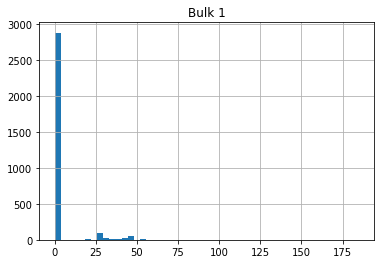

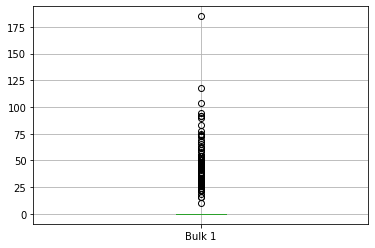

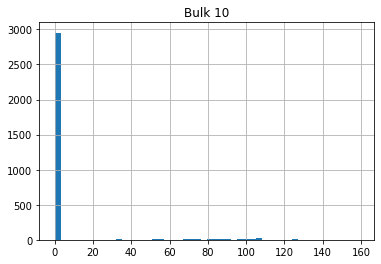

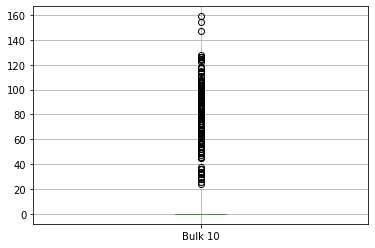

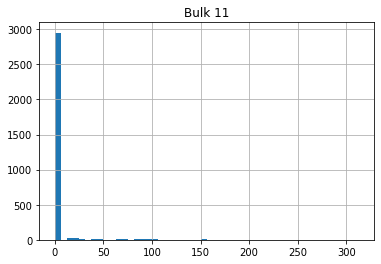

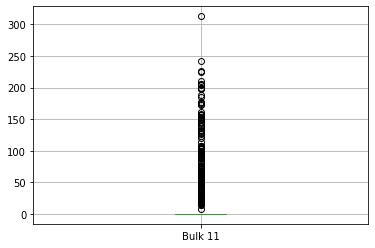

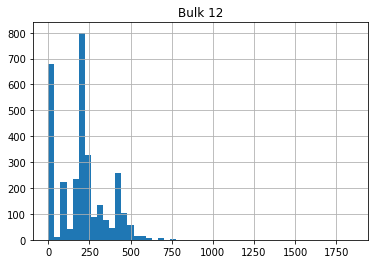

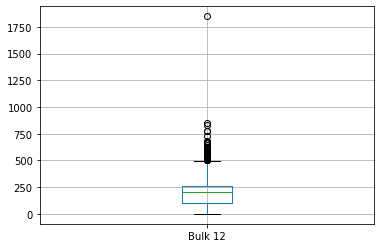

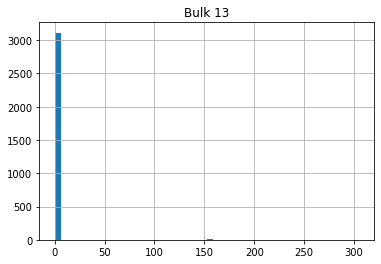

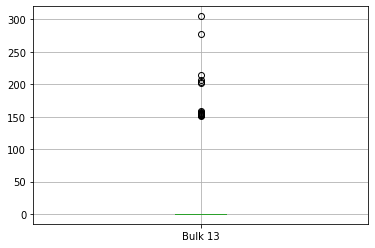

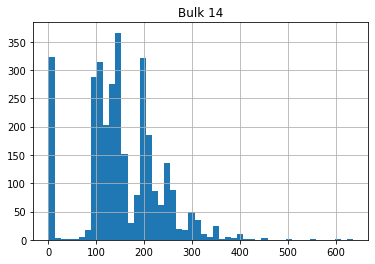

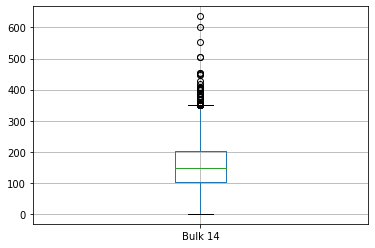

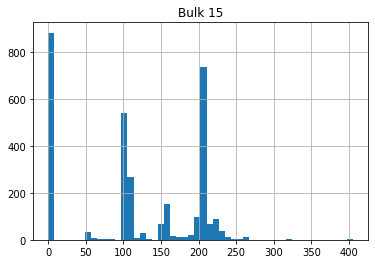

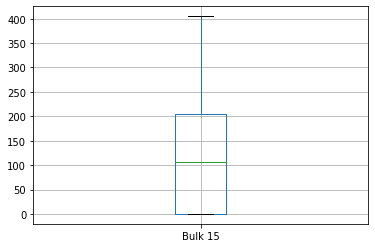

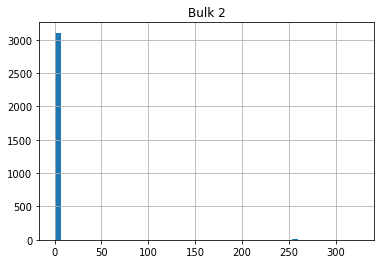

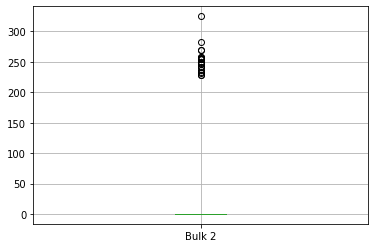

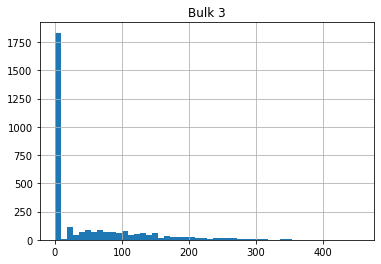

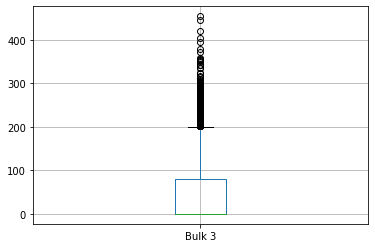

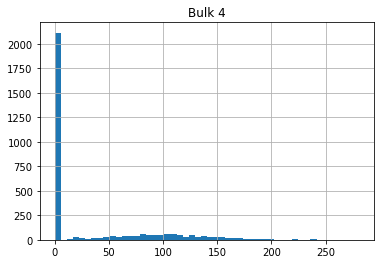

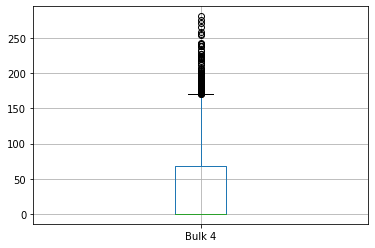

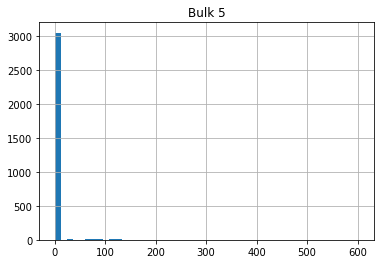

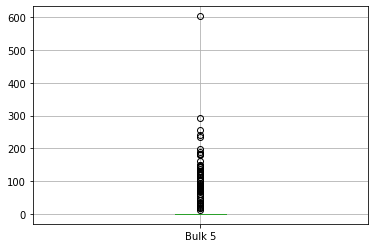

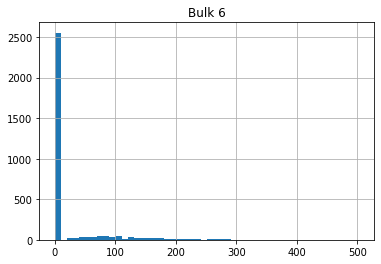

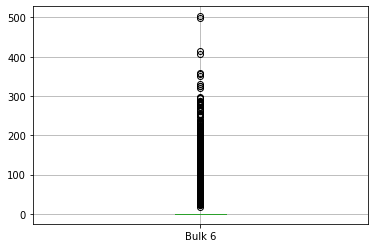

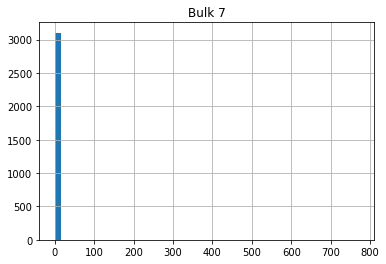

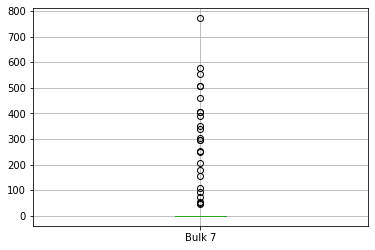

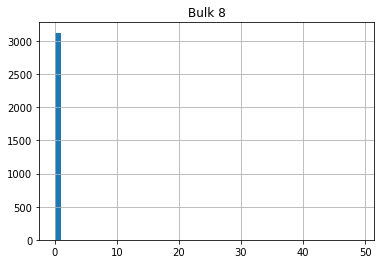

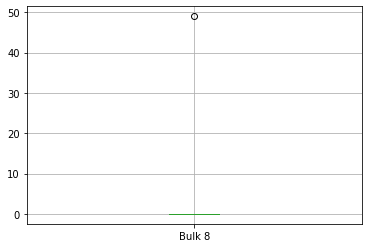

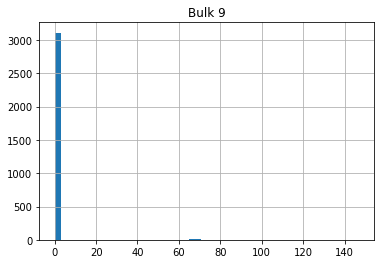

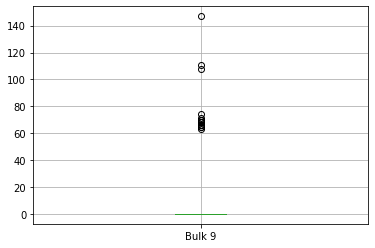

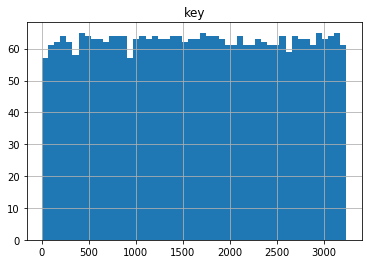

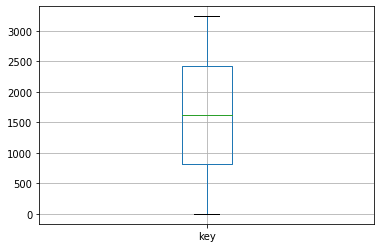

In [33]:
for column in (df_bulk.select_dtypes(include=['int64']) | df_bulk.select_dtypes(include=['float64'])).columns:
    df_bulk.hist(column, bins=50)
    plt.show()
    df_bulk.boxplot(column)
    plt.show()

In [34]:
df_bulk = df_bulk[['key', 'Bulk 12', 'Bulk 14', 'Bulk 15']]
df_bulk.columns = ['key', 'bulk_12', 'bulk_14', 'bulk_15']

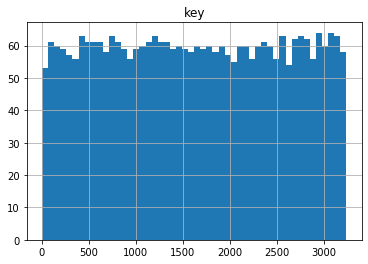

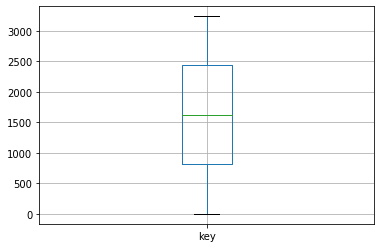

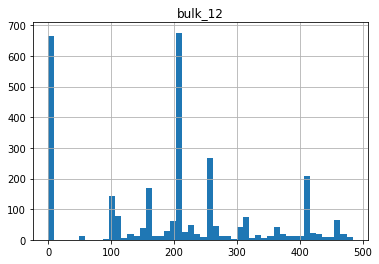

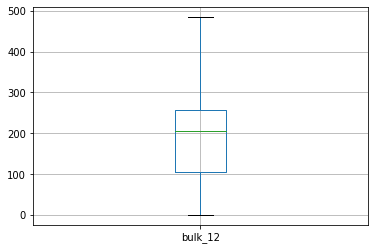

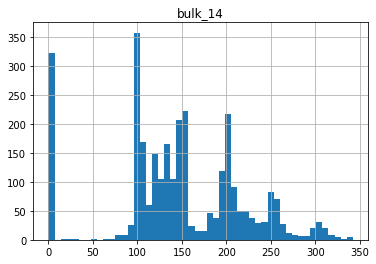

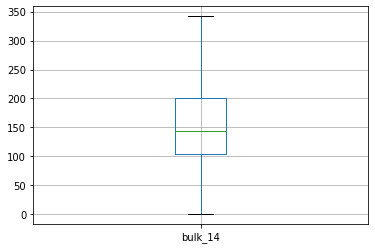

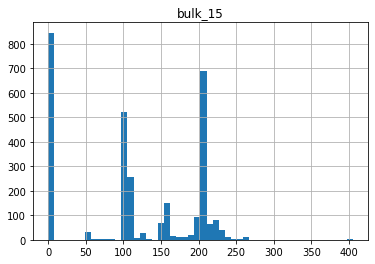

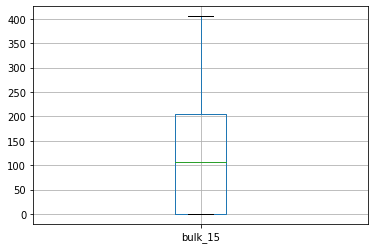

In [35]:
df_bulk = df_bulk.query('bulk_12 < 490 and bulk_14 < 345')
for column in df_bulk.columns:
    df_bulk.hist(column, bins=50)
    plt.show()
    df_bulk.boxplot(column)
    plt.show()

In [36]:
df_bulk = df_bulk.groupby(by = 'key').agg('sum').reset_index()
df_bulk.head()

,key,bulk_12,bulk_14,bulk_15
0,1,206.0,150.0,154.0
1,2,206.0,149.0,154.0
2,3,205.0,152.0,153.0
3,4,207.0,153.0,154.0
4,5,203.0,151.0,152.0


In [37]:
df_wire_time.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
key       3081 non-null int64
Wire 1    3055 non-null object
Wire 2    1079 non-null object
Wire 3    63 non-null object
Wire 4    14 non-null object
Wire 5    1 non-null object
Wire 6    73 non-null object
Wire 7    11 non-null object
Wire 8    19 non-null object
Wire 9    29 non-null object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


In [39]:
df_wire_time.describe()

,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


In [40]:
df_bulk_time.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


In [41]:
df_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
key        3129 non-null int64
Bulk 1     252 non-null object
Bulk 2     22 non-null object
Bulk 3     1298 non-null object
Bulk 4     1014 non-null object
Bulk 5     77 non-null object
Bulk 6     576 non-null object
Bulk 7     25 non-null object
Bulk 8     1 non-null object
Bulk 9     19 non-null object
Bulk 10    176 non-null object
Bulk 11    177 non-null object
Bulk 12    2450 non-null object
Bulk 13    18 non-null object
Bulk 14    2806 non-null object
Bulk 15    2248 non-null object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


In [42]:
df_bulk_time.describe()

,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>данные на базе) ОК, видно, что всё внимательно осмотренно...

<div class="alert alert-info"> <b>Комментарий студента 2:</b> Каждую используемую таблицу сразу сгруппировал по ключу, отбросил все временные признаки. Группировка температуры приведена немного ниже отдельным блоком </div>

In [43]:
df_temp.head()

,key,temp_time,temp
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


In [44]:
group_temp = df_temp.groupby(by='key').agg({'temp':['first', 'last', 'count']}).reset_index()
#group_temp.columns = ['_'.join(col).strip() for col in group_temp.columns.values]
group_temp.columns = ['key', 'temp_first', 'temp_last', 'temp_count']
group_temp.head()

,key,temp_first,temp_last,temp_count
0,1,1571.0,1613.0,5
1,2,1581.0,1602.0,6
2,3,1596.0,1599.0,5
3,4,1601.0,1625.0,3
4,5,1576.0,1602.0,2


In [45]:
group_temp['key'].value_counts().shape[0]

3216

In [46]:
group_temp = group_temp.query('temp_count != 1')
group_temp['key'].value_counts().shape[0]

2475

<div class="alert alert-info"> <b>Комментарий студента 2:</b> наконец-то около 2500 партий))) 

Теперь соединим с другими группированными таблицами, контролируя число строк:
</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 3</u></b>
</font>
<font color='green'><br>
ОК

Объединим таблицы по ключу 'key':

In [47]:
merge_1 = group_temp.merge(df_arc, on='key', how='inner')
print(merge_1.shape[0])
merge_1.head()

2475


,key,temp_first,temp_last,temp_count,active_power,reactive_power,full_power
0,1,1571.0,1613.0,5,3.218784,2.120572,3.854529
1,2,1581.0,1602.0,6,3.052598,1.998112,3.648398
2,3,1596.0,1599.0,5,2.525882,1.599076,2.989502
3,4,1601.0,1625.0,3,3.209250,2.060298,3.813674
4,5,1576.0,1602.0,2,1.725508,1.204867,2.104539


In [48]:
merge_2 = merge_1.merge(df_wire, on='key', how='left')
print(merge_2.shape[0])
merge_2.head()

2475


,key,temp_first,temp_last,temp_count,active_power,reactive_power,full_power,wire_1
0,1,1571.0,1613.0,5,3.218784,2.120572,3.854529,60.059998
1,2,1581.0,1602.0,6,3.052598,1.998112,3.648398,96.052315
2,3,1596.0,1599.0,5,2.525882,1.599076,2.989502,91.160157
3,4,1601.0,1625.0,3,3.209250,2.060298,3.813674,89.063515
4,5,1576.0,1602.0,2,1.725508,1.204867,2.104539,89.238236


In [49]:
merge_3 = merge_2.merge(df_bulk, on='key', how='left')
print(merge_3.shape[0])
merge_3.head()

2475


,key,temp_first,temp_last,temp_count,active_power,reactive_power,full_power,wire_1,bulk_12,bulk_14,bulk_15
0,1,1571.0,1613.0,5,3.218784,2.120572,3.854529,60.059998,206.0,150.0,154.0
1,2,1581.0,1602.0,6,3.052598,1.998112,3.648398,96.052315,206.0,149.0,154.0
2,3,1596.0,1599.0,5,2.525882,1.599076,2.989502,91.160157,205.0,152.0,153.0
3,4,1601.0,1625.0,3,3.209250,2.060298,3.813674,89.063515,207.0,153.0,154.0
4,5,1576.0,1602.0,2,1.725508,1.204867,2.104539,89.238236,203.0,151.0,152.0


In [50]:
df_final = merge_3.merge(df_gas, on='key', how='left')
print(df_final.shape[0])
df_final.head()

2475


,key,temp_first,temp_last,temp_count,active_power,reactive_power,full_power,wire_1,bulk_12,bulk_14,bulk_15,gas
0,1,1571.0,1613.0,5,3.218784,2.120572,3.854529,60.059998,206.0,150.0,154.0,NaN
1,2,1581.0,1602.0,6,3.052598,1.998112,3.648398,96.052315,206.0,149.0,154.0,12.555561
2,3,1596.0,1599.0,5,2.525882,1.599076,2.989502,91.160157,205.0,152.0,153.0,NaN
3,4,1601.0,1625.0,3,3.209250,2.060298,3.813674,89.063515,207.0,153.0,154.0,18.841219
4,5,1576.0,1602.0,2,1.725508,1.204867,2.104539,89.238236,203.0,151.0,152.0,5.413692


#### Все таблички я замерджил в одну большую, из которой можно будет выделить тренировочную  и тестовую выборки, а также поработать с фичами. Таблицы с временем bulk и wire я не стал добавлять, так как попросту не вижу корреляции между временем добавок и температурой

In [51]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 0 to 2474
Data columns (total 12 columns):
key               2475 non-null int64
temp_first        2475 non-null float64
temp_last         2475 non-null float64
temp_count        2475 non-null int64
active_power      2475 non-null float64
reactive_power    2475 non-null float64
full_power        2475 non-null float64
wire_1            2332 non-null float64
bulk_12           2286 non-null float64
bulk_14           2286 non-null float64
bulk_15           2286 non-null float64
gas               2331 non-null float64
dtypes: float64(10), int64(2)
memory usage: 251.4 KB


In [52]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 0 to 2474
Data columns (total 12 columns):
key               2475 non-null int64
temp_first        2475 non-null float64
temp_last         2475 non-null float64
temp_count        2475 non-null int64
active_power      2475 non-null float64
reactive_power    2475 non-null float64
full_power        2475 non-null float64
wire_1            2332 non-null float64
bulk_12           2286 non-null float64
bulk_14           2286 non-null float64
bulk_15           2286 non-null float64
gas               2331 non-null float64
dtypes: float64(10), int64(2)
memory usage: 251.4 KB


Проверим количество пропусков, отсортируем полученную таблицу по убыванию количества NaN

In [53]:
nan = df_final.isna().sum().sort_values(ascending=False)
nan

bulk_15           189
bulk_14           189
bulk_12           189
gas               144
wire_1            143
full_power          0
reactive_power      0
active_power        0
temp_count          0
temp_last           0
temp_first          0
key                 0
dtype: int64

<div class="alert alert-info"> <b>Комментарий студента 2:</b> Заполним пропуски медианными значениями по столбцам, т.к. распределения не очень нормальные </div>

In [54]:
df_final['bulk_12'] = df_final['bulk_12'].fillna(df_final['bulk_12'].median())
df_final['bulk_14'] = df_final['bulk_14'].fillna(df_final['bulk_14'].median())
df_final['bulk_15'] = df_final['bulk_15'].fillna(df_final['bulk_15'].median())
df_final['gas'] = df_final['gas'].fillna(df_final['gas'].median())
df_final['wire_1'] = df_final['wire_1'].fillna(df_final['wire_1'].median())

<div class="alert alert-info"> <b>Комментарий студента 2:</b> Итоговый размер: </div>

In [55]:
df_final.shape

(2475, 12)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='red'><br>Посмотри, пожалуйста с мержем ещё раз: у нас всего около 3400 партй. А тут строк расплодилось....<br>

<div class="alert alert-info"> <b>Комментарий студента:</b> Поменял мердж на способ иннер, и изменил порядок соединения - начал с таблицы с температурами и далее присоединил остальные </div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='red'><br><br>
Тут для модели лучше так: одна строка - одна партия. Поэтому, всё-таки, лучше так:<br>
1) выделяем те key, которые будут учавствовать в модели. Т.е. удалем те паортии, где нет последнего измерения! (таких партий около 2500). Столбец началоной температуры и столбец конечной температуры.<br>
2) А потом, к этой таблице начинаем присоединять другие факторы: газ, агрегированную мощность по партиям (можно полную, можно отношение мощностей), присадки по партиям, можно суммарные присадки.

<div class="alert alert-info"> <b>Комментарий студента 2:</b> Сделал то, что ты написал выше </div>

Удалим строки с пропусками в целевом признаке, т.к. я считаю некорректным заполнять неизвестные значения в целевой переменной

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='red'><br>ОК, в нашей целевой переменной есть пропущенные измерения. Когда по партиям последняя температура - не заполнена. И их лучше удалять. При этом, всю партию.<br>
Поэтому, тут так: надо организовать код так, чтобы удалять всю партию, где нет конечного измерения температуры.<br>  
Также, надо проверить случаи, когда в партии только одно измерение и начальная температура = конечной. И такие строки тоже исключить.

<div class="alert alert-info"> <b>Комментарий студента:</b> Согласен, я данный момент добавил в создании таблицы group ниже </div>

Переведем значения времени измерения температуры во временной формат, а также выделим столбцы с днем, часом, минутой и секундой в отдельные столбцы. 

Исследуем признаки на предмет корреляции с целевой переменной

In [56]:
for column in (df_final.select_dtypes(include=['int64']) | df_final.select_dtypes(include=['float64'])).columns:
    print(column)
    print(df_final[column].corr(df_final['temp_last']))
    print('------------')

active_power
0.050050629108214985
------------
bulk_12
0.2302775030634228
------------
bulk_14
0.05065126219742444
------------
bulk_15
0.028741694050599058
------------
full_power
0.0377828039586935
------------
gas
-0.04187083998711135
------------
key
-0.0811621756775154
------------
reactive_power
0.01605548846698528
------------
temp_count
0.04473440369582697
------------
temp_first
0.37662057864082826
------------
temp_last
1.0
------------
wire_1
0.19935668253726643
------------


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='red'><br> Тут такое дело: если у нас НЕ временные ряды тема, то факторы-даты и факторы-время - лучше не использовать. 

<div class="alert alert-info"> <b>Комментарий студента:</b> то есть даже в таком виде, как я выделил дни, часы и минуты их тоже нельзя использовать? Я пока оставил, т.к. использую это в группировке </div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='red'><br>Да, лучше дни-часы убрать. В данном проекте, это не могут быть факторами, которые влияют на температуру. Т.е. в среду или в субботу, например, есть ли разница? В продажах -да, там сезонность дня недели - хорошо видна. А тут - не из этой темы)

<div class="alert alert-info"> <b>Комментарий студента 2:</b> Временные переменные убрал. В новой таблице уже и какая никакая корреляция прослеживается :) 

Назвал также груп, чтобы код ниже не переписывать
</div>

In [57]:
group = df_final

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='red'><br> факторы мин/макс/среднее - вряд ли все вместе удобно использовать. При этом, надо держать в голове, что собираемся использовать эту иодель на практике. Т.е. сначала нам надо будет предсказать мин/макс мощности, газа и т.д. А потом уже предсказывать температуру... Это сложно, да и не точно будет для заказчика в итоге.... Как ты думаешь?

<div class="alert alert-info"> <b>Комментарий студента:</b> А почему? в нашей модели же уже имеются данные по добавкам, мощности и газосодержанию на момент, когда мы делаем прогноз? Т.е. их же не надо прогнозировать. А вообще наверно можно попробовать убрать мин и макс, но я бы наверно это оставил, т.к. эти параметры характеризуют распределения на предыдущих шагах подготовки материала для итоговой выплавки стали и прогноза температуры. Но если ты считаешь что все же надо что-то убрать, то я уберу.</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>Надо будет и их прогнозировать ещё. Смотри: мы включтлти в модель факторо мощности по партии. А теперь хотим узнать конечную температуру новой партии. И для этого надо будет сначала узнать предполагаемую затрачиваемую мощность по новой партии. И чеем меньше таких факторов, тем меньшая ошибка будет в итоге. И мин/макс - вообще дело рандомное , мне кажется...<br>
    
В данном случае, я не могу сказать, чт о это критический момент. Могу только дать рекомендацию, что лучше оставлять одно значение мощности.

<div class="alert alert-info"> <b>Комментарий студента 2:</b> Понятно, согласен </div>

In [58]:
group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 0 to 2474
Data columns (total 12 columns):
key               2475 non-null int64
temp_first        2475 non-null float64
temp_last         2475 non-null float64
temp_count        2475 non-null int64
active_power      2475 non-null float64
reactive_power    2475 non-null float64
full_power        2475 non-null float64
wire_1            2475 non-null float64
bulk_12           2475 non-null float64
bulk_14           2475 non-null float64
bulk_15           2475 non-null float64
gas               2475 non-null float64
dtypes: float64(10), int64(2)
memory usage: 251.4 KB


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='red'><br> не более 2500 пратий в итоге ожидается)

<div class="alert alert-info"> <b>Комментарий студента:</b> из-за того, что я группирую не только по партии, но и по значениям из времени замеров, то есть повторы партий из-за различий времени замера. Соответственно если выше ты настаиваешь на том, чтобы убрать все значения, связанные с датами, то группировка будет иной </div>

In [59]:
group.describe()

,key,temp_first,temp_last,temp_count,active_power,reactive_power,full_power,wire_1,bulk_12,bulk_14,bulk_15,gas
count,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000
mean,1250.787071,1588.402020,1595.336162,4.955556,2.525904,1.866665,3.144729,100.166211,195.044444,147.272727,115.002828,10.067504
std,719.787271,29.243044,16.023153,1.807323,1.063491,0.783599,1.311616,39.628532,132.625477,73.101492,82.105609,4.328760
min,1.000000,1191.000000,1541.000000,2.000000,0.186226,0.158247,0.257637,0.000000,0.000000,0.000000,0.000000,0.008399
25%,629.500000,1572.000000,1587.000000,4.000000,1.799996,1.314326,2.247629,75.064076,106.000000,106.000000,0.000000,7.107758
50%,1252.000000,1588.000000,1593.000000,5.000000,2.452079,1.809159,3.054317,100.158234,205.000000,146.000000,106.000000,9.629162
75%,1872.500000,1605.000000,1599.000000,6.000000,3.128971,2.320925,3.899105,125.121364,256.000000,200.000000,203.000000,12.625689
max,2499.000000,1679.000000,1700.000000,16.000000,8.821183,6.955933,11.232843,199.882806,484.000000,342.000000,405.000000,21.920936


In [60]:
group.shape

(2475, 12)

In [61]:
group.isna().sum()

key               0
temp_first        0
temp_last         0
temp_count        0
active_power      0
reactive_power    0
full_power        0
wire_1            0
bulk_12           0
bulk_14           0
bulk_15           0
gas               0
dtype: int64

In [62]:
group.duplicated().sum()

0

В процессе исследования была попытка стандартизировать и отскейлить данные, но к улучшению результата она не привела.

In [63]:
#numeric = group.columns.to_list()[1:]
#numeric.remove('temp last')
#numeric

In [64]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#group[numeric] = scaler.fit_transform(group[numeric])
#group

In [65]:
features_train, features_test, target_train, target_test = train_test_split(
    group.drop(['key', 'temp_last','temp_count', 'active_power', 'reactive_power'], axis=1), group['temp_last'])

In [66]:
print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(1856, 7)
(1856,)
(619, 7)
(619,)


In [67]:
%%time
model = LinearRegression(n_jobs=14, normalize=True)
model.fit(features_train, target_train)
predicted = model.predict(features_test)

mae = mean_absolute_error(target_test, predicted)
rmse = mean_squared_error(target_test, predicted) ** 0.5
print('mae =', mae)
print('rmse =', rmse)

mae = 8.765278320171605
rmse = 13.447863013691306
CPU times: user 11.4 ms, sys: 0 ns, total: 11.4 ms
Wall time: 6.46 ms


In [68]:
%%time

from sklearn.linear_model import Ridge

#['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']:
model = Ridge(normalize=True, alpha=0.001, random_state=123)
model.fit(features_train, target_train)
predicted = model.predict(features_test)

mae = mean_absolute_error(target_test, predicted)
rmse = mean_squared_error(target_test, predicted) ** 0.5
#print('alpha =', np.round(i, 2))
print('mae =', np.round(mae, 3))
print('rmse =', np.round(rmse, 2))
#print('----------')

mae = 8.765
rmse = 13.45
CPU times: user 9.89 ms, sys: 4.11 ms, total: 14 ms
Wall time: 7.83 ms


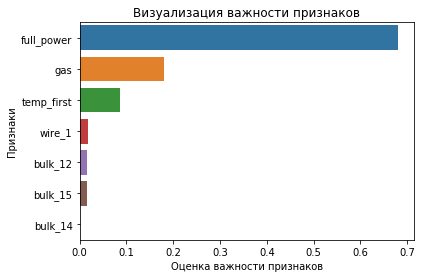

In [69]:
import seaborn as sns
def chart_feature_imp(model):
    feature_imp = pd.Series(np.abs(model.coef_) / np.abs(model.coef_).sum(), index=features_test.columns).sort_values(ascending=False)

    ax = sns.barplot(x=feature_imp, y=feature_imp.index)
    _ = ax.set(xlabel='Оценка важности признаков', ylabel='Признаки')
    _ = ax.set_title('Визуализация важности признаков')

chart_feature_imp(model)

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
params = {'n_estimators' : [300, 600, 1000], 'criterion': ['mae'], 'max_depth' : [5, 20, 50]}
gs = GridSearchCV(RandomForestRegressor(), n_jobs=-1, cv=3, scoring='neg_mean_absolute_error', 
                  verbose=4, param_grid=params)

gs.fit(features_train, target_train)

In [ ]:
gs.best_score_

In [ ]:
gs.best_params_

In [ ]:
gs.best_estimator_

In [70]:
%%time
model = RandomForestRegressor(n_estimators=1000, criterion='mae', n_jobs=-1, max_depth=20, random_state=123)

model.fit(features_train, target_train)
predicted = model.predict(features_test)

mae = mean_absolute_error(target_test, predicted)
rmse = mean_squared_error(target_test, predicted) ** 0.5
print('mae =', mae)
print('rmse =', rmse)

mae = 7.925843295638126
rmse = 11.853903005800273
CPU times: user 2min 3s, sys: 88.9 ms, total: 2min 3s
Wall time: 2min 6s


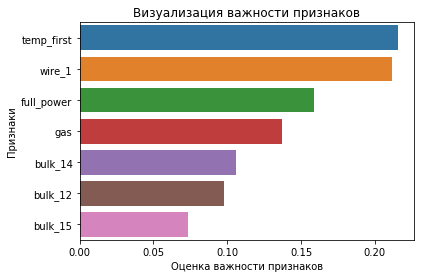

In [71]:
import seaborn as sns
def chart_feature_imp(model):
    feature_imp = pd.Series(model.feature_importances_, index=features_test.columns).sort_values(ascending=False)

    ax = sns.barplot(x=feature_imp, y=feature_imp.index)
    _ = ax.set(xlabel='Оценка важности признаков', ylabel='Признаки')
    _ = ax.set_title('Визуализация важности признаков')

chart_feature_imp(model)


In [72]:
target_test.head(10)

1841    1591.0
117     1620.0
1524    1591.0
570     1588.0
2463    1583.0
408     1596.0
1540    1592.0
476     1588.0
156     1620.0
973     1610.0
Name: temp_last, dtype: float64

In [73]:
list(predicted)[:11]

[1593.922,
 1607.37,
 1596.359,
 1591.4635,
 1589.9615,
 1587.314,
 1594.6635,
 1591.9,
 1593.3085,
 1601.915,
 1596.125]

Исследуем модель градиентного бустинга - lightGBM

In [74]:
import lightgbm as lgb

In [75]:
%%time
params = {'n_estimators' : [30], 'max_depth' : [1, 5, 10, 20, 50], 'learning_rate' : [0.15]}#, 'lambda_l2' : [0.01, 0.1, 0.25, 0.5, 1, 5, 10]}
gs = GridSearchCV(lgb.LGBMRegressor(), n_jobs=-1, cv=3, scoring='neg_mean_absolute_error', verbose=4, param_grid=params)

gs.fit(features_train, target_train)
print(gs.best_score_)
print(gs.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] learning_rate=0.15, max_depth=1, n_estimators=30 ................
[CV]  learning_rate=0.15, max_depth=1, n_estimators=30, score=-9.186, total=   0.0s
[CV] learning_rate=0.15, max_depth=1, n_estimators=30 ................
[CV]  learning_rate=0.15, max_depth=1, n_estimators=30, score=-9.019, total=   0.1s
[CV] learning_rate=0.15, max_depth=1, n_estimators=30 ................


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  learning_rate=0.15, max_depth=1, n_estimators=30, score=-9.376, total=   0.1s
[CV] learning_rate=0.15, max_depth=5, n_estimators=30 ................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV]  learning_rate=0.15, max_depth=5, n_estimators=30, score=-7.734, total=   0.3s
[CV] learning_rate=0.15, max_depth=5, n_estimators=30 ................
[CV]  learning_rate=0.15, max_depth=5, n_estimators=30, score=-7.739, total=   0.2s
[CV] learning_rate=0.15, max_depth=5, n_estimators=30 ................
[CV]  learning_rate=0.15, max_depth=5, n_estimators=30, score=-7.895, total=   0.3s
[CV] learning_rate=0.15, max_depth=10, n_estimators=30 ...............
[CV]  learning_rate=0.15, max_depth=10, n_estimators=30, score=-7.881, total=   0.3s
[CV] learning_rate=0.15, max_depth=10, n_estimators=30 ...............
[CV]  learning_rate=0.15, max_depth=10, n_estimators=30, score=-7.988, total=   0.4s
[CV] learning_rate=0.15, max_depth=10, n_estimators=30 ...............
[CV]  learning_rate=0.15, max_depth=10, n_estimators=30, score=-8.120, total=   0.4s
[CV] learning_rate=0.15, max_depth=20, n_estimators=30 ...............
[CV]  learning_rate=0.15, max_depth=20, n_estimators=30, score=-7.9

[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.8s finished


In [76]:
%%time
model = lgb.LGBMRegressor(learning_rate=0.15, n_estimators=30, random_state=123, boosting_type='gbdt')#, lambda_l1=0.25)

model.fit(features_train, target_train)
predicted = model.predict(features_test)

mae = mean_absolute_error(target_test, predicted)
rmse = mean_squared_error(target_test, predicted) ** 0.5
print('mae =', mae)
print('rmse =', rmse)

mae = 7.6919900031686295
rmse = 11.393654454238158
CPU times: user 418 ms, sys: 8.12 ms, total: 426 ms
Wall time: 404 ms


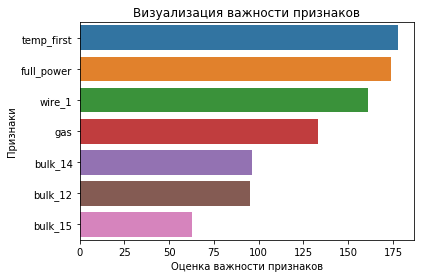

In [77]:
import seaborn as sns
def chart_feature_imp(model):
    feature_imp = pd.Series(model.feature_importances_, index=features_test.columns).sort_values(ascending=False)

    ax = sns.barplot(x=feature_imp, y=feature_imp.index)
    _ = ax.set(xlabel='Оценка важности признаков', ylabel='Признаки')
    _ = ax.set_title('Визуализация важности признаков')

chart_feature_imp(model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Conv2D, AvgPool2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.build(input_shape=(None, 9))
optimizer = Adam(lr=1e-2)
model.compile(loss='mse', metrics='mae', optimizer=optimizer)
model.summary()

In [ ]:
model.fit(features_train, target_train, validation_split=0.25, batch_size=32, epochs=60, verbose=1)

### Исследованные подходы (на момент первой проверки):
1. StdScaler не сработал; mae=6.9
2. добавление признака full_power feature не сильно улучшило работу; mae=6.8
3. без признака full_power; mae=6.7
4. удаление признака 'gas' ухудшает метрику; mae=7.6

### Выводы
- [x] был проведен исследовательский анализ данных
- [x] проведена предобработка данных
- [x] выделены признаки из исходных данных
- [x] исследованы разные модели машинного обучения
- [x] описаны различные подходы
- [x] выбрана модель с лучшей метрикое МАЕ = 8.16, модель случайного леса

Спасибо за скорую проверку! жду комментариев и ответов на вопросы!

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>

Артём, скажу, что уверенная и сильная работа, на мой взгляд)<br>
Обработка данных, супермногогранная модельная работа, конечные результаты - многое удалось как надо<br> Очень здорово, что сразу ищешь новые фичи, думаешь над ними, анализируешь. Это тот самый подход, который нужен, чтобы искать ту саму модель для заказчика)<br> Отлично, что используешь анализ важности признаков.<br>
    
Есть вопросы, связанные с формированием исходного датасета для работы. Постарался в тектсе оставить комментарии по проблематикам.    
<font color='red'><br>   
Как и говорил, работа цельная. Осталось лишь несколько моментов довести до логического завершения))<br>
1) Ожидается всего не более 2500 партий: надо посмоетрть ещё мерж и удаление партий с пустым последнем измерением и партий, где первая температура = последней.<br>
    
2) Фактор key - его лучше не использовать в моедли. Это всего лишь набор цифр..<br>
 
3) Факторы даты и времени - тоже лучше не тиспользовать в модели. <br>
        
<font color='green'>
Артём, однозначно видно, что ты сделал хорошую работу.<br>
Тут без вариантов. И теперь осталось небольшие ньюанасы<br>
Посмотри, пожалуйста, пожалуйста.<br>


Спасибо)<br>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ.

<div class="alert alert-info"> <b>Комментарий студента:</b> Удалил партии с 1 значением, убрал ключ и даты-время из признаков на обучение. Пробовал эксперименты с только начальными значениями параметров, вместо мин мак и среднего, но это привело только к ухудшению метрики больше 8.8-9, из-за чего я даже на минимальный балл пройти не смогу. В итоге я решил оставить эти мин-макс-среднее, чтобы хотя бы какой-то балл набрать (RF, mae=8.16). Также попробовал прирутить простенькую полносвязную нейронку, но обучить ее с приемлемым значением даже на валидации не вышло, так что я оставил ее в коде, но смысла в этом не много.
Как исправить полноценно чтобы улучшилась и правильность работы с признаками и метрика, я не знаю. Если того что я исправил недостаточно, то прошу помощи. Как разобраться лучше пока не знаю.
</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='red'><br>Артём, я постарался написать ещё коммепнтарии по твоим идеям. Основное - это то, что факторы времени лучше не использовать. И то, как лучше сформировать таблицу данных для моделирования. Повоторю тут:<br>
1) В таблице с температурой, выделяем те key, которые будут учавствовать в модели. Т.е. удалем те паортии, где нет последнего измерения! (таких партий около 2500). Делаем столбец началоной температуры и столбец конечной температуры по партии..<br>
2) А потом, к этой таблице начинаем присоединять другие факторы: газ, агрегированную мощность по партиям (можно полную, можно отношение мощностей), присадки по партиям, можно суммарные присадки.<br>
    
Посмотри, пожалуйста, ещё раз с учётом написанного.<br>
Должно точно в этот раз всё получиться. Я постараюсь завтра быстро проверить.

<div class="alert alert-info"> <b>Комментарий студента 2:</b> Спасибо за пояснения во втором ревью. Теперь мне стало понятнее. Замечания исправил и метрика даже немного улучшилась - лучшая МАЕ также у случайного леса и равна она 8 и на бустинге получлось мае=7.9 </div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 3</u></b>
</font>
<font color='red'><br>
Артём, привет!<br>
ОК, с доработками - понятно у тебя. С метрикой - не очень...<br>
Посмотри, пожалуйста, такой момент: я сейчас убрал из мдели активную и реактивную мощности (они имеют мультиколлинарность  с полной мощностью). Также сделал полную мощность - суммарную (не среднюю по партии) и метрика опустилась до 7,6<br>
    
Если у тебя еть время, то можно попробовать побороться за метрику)<br>
Напрмиер, сделать суммарные присадки как фактор тоже. Попробовать общее время нагрева поставить....(надо проверить на мультиколлинеарость будет...).<br>
    
Будет время этим заняться ещё?

<div class="alert alert-info"> <b>Комментарий студента 3:</b> Я поменял на сумму в присадках вместо среднего, сильного буста метрики нет (да и просто никакого буста нет), я думаю можно принять так, если ты не против. Баллы мне не принципиальны, но вот в дедлайн надо уложиться - мне еще отчет надо сдать до 11 числа. А потом я для загрузки на гитхаб постараюсь это как-то еще покрутить. Большое спасибо за отличные ревью, и конкретно за это с кучей обсуждений и комментариев. </div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>
Привет, Артём!<br>
ОК, услышал тебя. Хорошо, договорились.<br>
Такой ещё момент: присадки медианой заполнять не стоит (как-то пропустил ,что-ли в прошлый раз) Все пропуски - это ноль присадок - ничего не засыпали.<br>
 
<br>
Здесь, наверное, стоит вот ещё что заметить: цель заказчика - экономия энергоресурсов.<br>
И в этом проекте искали как раз способ точно предсказывать температуру. И круто использовали для этого весь арсенал<br>
А если рассудать с позиции такой: а что нужно сделать, чтобы снизить энергопотребление?<br>
Судя по модели, самым важным фактором является первая температура. Это значит, что управляя ею, мы сможем управлять энергозатратами. Вывод понятен. Теперь надо разработать мероприятия для этого решения. И тут вопрос возникает скм собой: а это так точно? мы можем управлять первой температурой? В общем, наша модель - только начало работы над энергоэффективностью.<br>
    
Так же есть ещё одна идея, которую хотел предложить тебе на обсуждение.<br>
Возможно, покажется интересным<br><br> 

Дело касается принципиально иного подхода к поиску решения для снижения энергопотребления на производстве<br>
Смотри, Создание данной модели (таково было задание) двигалось по пути "угадывания" температуры<br>
Но мы же знаем жизнь)) лёгкие колебания температур (как и нашего настроения, нашего веса.....)<br>
есть всегда. Более того - будут вегда! И нам что, стараться угадывать их?<br>
Не угонимся, "пупок" развяжется))))) <br>
Предложу для подобных проектов подумать вот в какую сторону<br>
    
Итак, разброс в измерениях - есть, был и будет!! (т.к. этому благоприятствует разнообразие факторов самого проиозводства)<br>
    Тогда задачу можно поставить так: <u>надо уменьшить разброс в измерениях</u>. В данном случае в температуре.<br>
Один из подходов такой: Наверняка есть границы, в пределах которых колебания температур - дело нормальное.<br>
А что, если фикировать случаи, когда температура выходит за эти границы?<br>
Скажем, как "1". И тогда для таких моментов времени собирать инфо по производству: <br>
а что был за материал (химия материала), что был за газ (химический состав газа), какая бригада работала, <br>
что там было с электродами, ограничения только в фантазиях ну и в знаниях самого производства..... <br>
И вот тут можем реально находить причины (через корреляции, проверки гипотез, разные модельки...), фиксировать эти причины. <br>
Ну и разрабатывать энергосберегательные мероприятия.<br><br>
 
<font color='green'>

Спасибо и за этот труд, и за совместную работу на других проектах, и за отклик) Рад, если смог помочь в чём-то подразобраться.<br>
Искренне желаю покорить ещё не один аналитический Эверест)

# Отчет о выполненной работе

- Какие пункты плана были выполнены, а какие — нет (поясните почему)?
- Какие трудности возникли и как вы их преодолели?
- Какие ключевые шаги в решении задачи выделили?
- Какая ваша итоговая модель и какое у неё качество?

### План работы

1. предобработка данных (замена пропусков, удаление столбцов где пропусков слишком много, поиск аномалий, удаление выбросов)
2. отбор важных признаков, удаление бесполезных признаков
3. деление на тренировочную и тестовую выборку
4. создание и поиск лучших моделей М.О.
5. тестирование результатов работы лучших моделей
6. описание выводов

- Все пункты плана были выполнены в полном объеме.
- В процессе выполнения возникли сложности с правильностью группировки исходных данных, которые удалось преодолеть с помощью подсказки ревьюера. В результате таблицы были объединены в одну общую, куда также был добавлен новый признак - полная мощность. Также были трудности с получением нужного значения метрики, но после правильной группировки исходных данных эта проблема оказалась решена.
- Ключевые шаги (этапы) решения это: уяснение задачи, исследовательский анализ данных, предобработка данных, построение моделей машинного обучения, тестирование моделей.
- Лучшая модель - LGBMRegressor - градиентный бустинг, метрика МАЕ=6.79